# Exercise 01.1

Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

In [1]:
from math import pi
from math import floor
def mult_dec_pi(a, b):
     # Add the solution here
    if (a>0 and a<=15) and (b>0 and b<=15):
        da=str(floor((pi-3)*10e15))
        result = int(da[a-1])*int(da[b-1])
    else:
        result = "Error"
    return result

In [2]:
mult_dec_pi(a=2, b=4)
# 20.0

20

In [3]:
mult_dec_pi(a=5, b=10)
# 45.0

45

In [4]:
mult_dec_pi(a=14, b=1)
# 9.0

9

In [5]:
mult_dec_pi(a=6, b=8)
# 10.0

10

In [6]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

'Error'

# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

Text(0,0.5,'Employed')

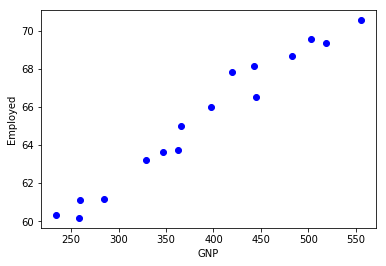

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")



In [8]:
X=np.column_stack(([1]*n_obs,data[:,2] ))
Y=data[:,1]
B = (np.linalg.inv(X.transpose() @ X) @ X.transpose()) @ Y
print(B)

[5.18435898e+01 3.47522943e-02]


Los coeficientes son estimados son 
 
 b0= 51.84359 
 b1= 0.034752


Text(0,0.5,'Employed')

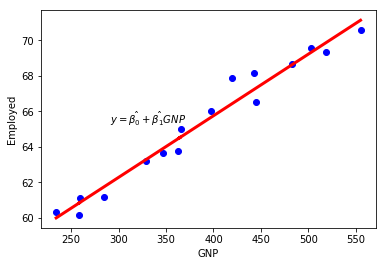

In [9]:
print("Los coeficientes son estimados son \n",
      "\n b0=",round(B[0],6),
      "\n b1=",round(B[1],6))

x=data[:, 2]
plt.plot(x, Y, "bo", color='blue')
plt.plot(x, B[0]+B[1]*x, color='red', linewidth=3)
plt.text(np.mean(x)-np.std(x),np.mean(Y),r'$y=\hat{\beta _0} + \hat{\beta _1}GNP$')
plt.xlabel("GNP")
plt.ylabel("Employed")

# Exercise 01.3

Analyze the baby names dataset using pandas

In [10]:
import pandas as pd
# Load dataset
import zipfile
with zipfile.ZipFile('../datasets/baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [11]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [12]:
names[names.year == 1993].head()

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


### segment the data into boy and girl names

In [13]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

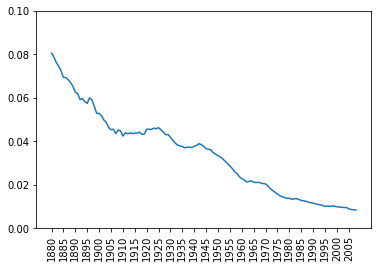

In [14]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

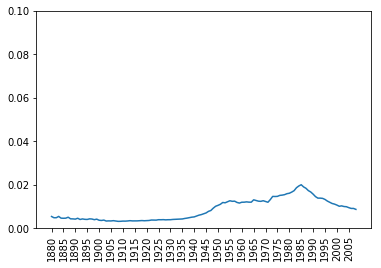

In [15]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

In [16]:
ind=boys.groupby(['year'])['prop'].transform(max)==boys['prop']
boys_year=pd.DataFrame(boys[ind])
boys_year['decada']=(boys_year['year']//10)*10
boys_year.head(10)

,year,name,prop,sex,soundex,decada
0,1880,John,0.081541,boy,J500,1880
1000,1881,John,0.080975,boy,J500,1880
2000,1882,John,0.078314,boy,J500,1880
3000,1883,John,0.079066,boy,J500,1880
4000,1884,John,0.076476,boy,J500,1880
5000,1885,John,0.075517,boy,J500,1880
6000,1886,John,0.075820,boy,J500,1880
7000,1887,John,0.074181,boy,J500,1880
8000,1888,John,0.071186,boy,J500,1880
9000,1889,John,0.071804,boy,J500,1880


Contamos los años en que ha dominado un nombre durante la decada

In [17]:
boys_decada=boys_year.groupby(['decada', 'name' ],as_index=False).size()
boys_decada.name='n_year'
boys_decada=boys_decada.reset_index()
boys_decada

,decada,name,n_year
0,1880,John,10
1,1890,John,10
2,1900,John,10
3,1910,John,10
4,1920,John,4
5,1920,Robert,6
6,1930,Robert,10
7,1940,James,10
8,1950,James,3
9,1950,Michael,6


Asignamos  a la decada el nombre que domino durante mas tiempo

In [18]:
ind=boys_decada.groupby(['decada'])['n_year'].transform(max)==boys_decada['n_year']
boys_popular=pd.DataFrame(boys_decada[ind])
boys_popular

,decada,name,n_year
0,1880,John,10
1,1890,John,10
2,1900,John,10
3,1910,John,10
5,1920,Robert,6
6,1930,Robert,10
7,1940,James,10
9,1950,Michael,6
12,1960,Michael,9
13,1970,Michael,10


# Exercise 01.4

Which has been the most popular girl name?


In [19]:
ind=girls.groupby(['year'])['prop'].transform(max)==girls['prop']
girls_year=pd.DataFrame(girls[ind])
girls_year['decada']=(girls_year['year']//10)*10
girls_year.head(10)

,year,name,prop,sex,soundex,decada
129000,1880,Mary,0.072381,girl,M600,1880
130000,1881,Mary,0.069986,girl,M600,1880
131000,1882,Mary,0.070431,girl,M600,1880
132000,1883,Mary,0.066737,girl,M600,1880
133000,1884,Mary,0.066990,girl,M600,1880
134000,1885,Mary,0.064300,girl,M600,1880
135000,1886,Mary,0.064334,girl,M600,1880
136000,1887,Mary,0.063620,girl,M600,1880
137000,1888,Mary,0.062041,girl,M600,1880
138000,1889,Mary,0.061562,girl,M600,1880


In [20]:
#Años de popularidad
girls_popyear=girls_year.groupby(['name' ],as_index=False).size()
girls_popyear.name='n_year'
girls_popyear=girls_popyear.reset_index()
girls_popyear.sort_values(['n_year'], ascending=0)


,name,n_year
7,Mary,76
3,Jennifer,15
1,Emily,12
4,Jessica,9
6,Lisa,8
5,Linda,6
0,Ashley,2
2,Emma,1


###### Mary ha sido el nombre mas popular durante 76 años

# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

In [27]:
#Nos quedamos con los nombres que no existian antes del año 2000
girls_antes=pd.DataFrame(girls.loc[girls.year<2000])
girls_antes=pd.DataFrame(girls_antes.name.unique(),columns=['name'])
girls_antes['Antes2000']='Si'

girls_2000=girls.merge(girls_antes, on='name', how='left')
girls_2000=girls_2000[pd.isnull(girls_2000['Antes2000'])]

girls_2000.head(10)

,year,name,prop,sex,soundex,Antes2000
120395,2000,Litzy,0.000361,girl,L320,NaN
120480,2000,Brisa,0.000282,girl,B620,NaN
120567,2000,Amya,0.000230,girl,A500,NaN
120728,2000,Jackeline,0.000160,girl,J245,NaN
120756,2000,Kaya,0.000151,girl,K000,NaN
120769,2000,Jaquelin,0.000149,girl,J245,NaN
120771,2000,Hailie,0.000148,girl,H400,NaN
120788,2000,Nyah,0.000146,girl,N000,NaN
120797,2000,Amara,0.000143,girl,A560,NaN
120835,2000,Dariana,0.000134,girl,D650,NaN


In [29]:
ind=girls_2000.groupby(['year'])['prop'].transform(max)==girls_2000['prop']
girls_2000y=pd.DataFrame(girls_2000[ind])
girls_2000y

,year,name,prop,sex,soundex,Antes2000
120395,2000,Litzy,0.000361,girl,L320,NaN
121265,2001,Nevaeh,0.000604,girl,N100,NaN
122189,2002,Nevaeh,0.000860,girl,N100,NaN
123144,2003,Nevaeh,0.001144,girl,N100,NaN
124103,2004,Nevaeh,0.001575,girl,N100,NaN
125068,2005,Nevaeh,0.002239,girl,N100,NaN
126042,2006,Nevaeh,0.002833,girl,N100,NaN
127030,2007,Nevaeh,0.003208,girl,N100,NaN
128033,2008,Nevaeh,0.002914,girl,N100,NaN


###### "Nevaeh" es el nuevo nombre femenino más popular